# 测试Qldpc code在MLD解码

In [ ]:
import stim
nkd_72_12_6_r1 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r1/circuit_noisy_si1000_p10.stim"
nkd_72_12_6_r6 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r6/circuit_noisy_si1000_p10.stim"
nkd_90_8_10_r1 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r1/circuit_noisy_si1000_p10.stim"
nkd_90_8_10_r10 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r10/circuit_noisy_si1000_p10.stim"
nkd_108_8_10_r1 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r1/circuit_noisy_si1000_p10.stim"
nkd_108_8_10_r10 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r10/circuit_noisy_si1000_p10.stim"
nkd_144_12_12_r1 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_144_12_12_r1/circuit_noisy_si1000_p10.stim"
nkd_144_12_12_r12 = "../data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_144_12_12_r12/circuit_noisy_si1000_p10.stim"

list_of_bb_code = [nkd_72_12_6_r1, nkd_72_12_6_r6, nkd_90_8_10_r1, nkd_90_8_10_r10, nkd_108_8_10_r1, nkd_108_8_10_r10, nkd_144_12_12_r1, nkd_144_12_12_r12]
circuit_noisy_r1 = stim.Circuit.from_file(nkd_72_12_6_r1)
circuit_noisy_rd = stim.Circuit.from_file(nkd_72_12_6_r6)

dem_r1 = circuit_noisy_r1.detector_error_model(decompose_errors=False, flatten_loops= True)
dem_rd = circuit_noisy_rd.detector_error_model(decompose_errors=False, flatten_loops= True)

## 收缩策略

### 转化为超图

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71']
hyperedges: [('D0', 'D1', 'D23'), ('D0', 'D1', 'D59'), ('D0', 'D5', 'D22'), ('D0', 'D5', 'D58'), ('D0', 'D6', 'D33'), ('D0', 'D6', 'D69'), ('D0', 'D9', 'D15'), ('D0', 'D15', 'D46', 'D62'), ('D0', 'D19', 'D20'), ('D0', 'D27', 'D30'), ('D0', 'D27', 'D53', 'D67'), ('D0', 'D30', 'D63'), ('D0', 'D36'), ('D0', 'D37', 'D59'), ('D0', 'D44', 'D53', 'D64', 'D67'), ('D0', 'D63', 'D66'), ('D1', 'D2', 'D18'), ('D1', 'D2', 'D54'), ('D1', 'D7', 'D34'), ('D1', 'D7', 'D70'), ('D1', 'D10', 'D16'), ('D1', 'D16',

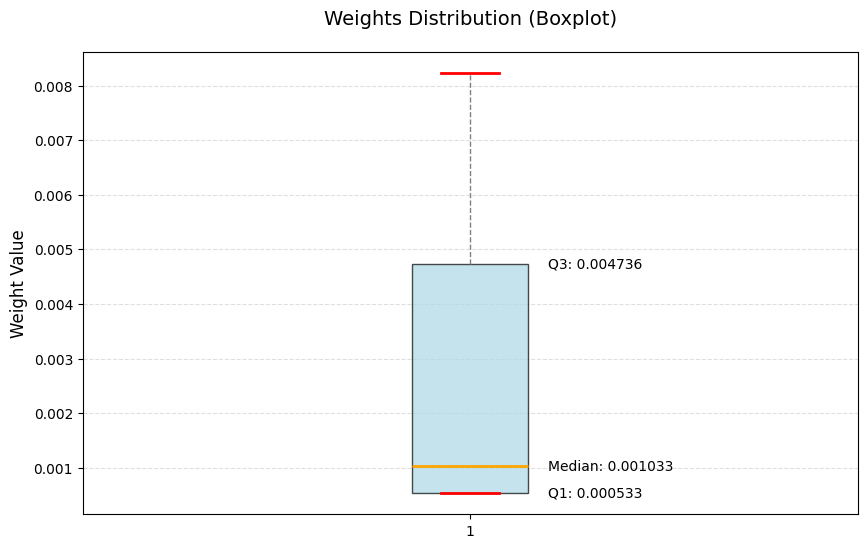

In [ ]:
from hamld.contraction_strategy.dem_to_hypergraph import DetectorErrorModelHypergraph
import stim
hypergraph = DetectorErrorModelHypergraph(detector_error_model=dem_r1)
nodes = hypergraph.get_nodes()
hyperedges = hypergraph.get_hyperedges()
weights = hypergraph.get_weights()

print(f"nodes: {nodes}")
print(f"hyperedges: {hyperedges}")
print(f"weights: {weights}")
print("len(weights)", len(weights))

import matplotlib.pyplot as plt
import numpy as np

# 将Decimal转换为浮点数
floats_weights = list(map(float, weights))


# 绘制箱线图
plt.figure(figsize=(10, 6))
box = plt.boxplot(floats_weights, vert=True, patch_artist=True,
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 whiskerprops=dict(color='gray', linestyle='--'),
                 capprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2),
                 flierprops=dict(marker='o', markerfacecolor='green', markersize=8))

# 标注统计值
q1, q3 = np.percentile(floats_weights, [25, 75])
median = np.median(floats_weights)
plt.text(1.1, q1, f'Q1: {q1:.6f}', va='center', fontsize=10)
plt.text(1.1, median, f'Median: {median:.6f}', va='center', fontsize=10)
plt.text(1.1, q3, f'Q3: {q3:.6f}', va='center', fontsize=10)

# 标题和网格
plt.title("Weights Distribution (Boxplot)", fontsize=14, pad=20)
plt.ylabel("Weight Value", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

箱子填充浅蓝色，中位线为橙色。

须线为灰色虚线，异常点为绿色圆圈。

右侧标注了Q1、中位数、Q3的具体数值。

In [ ]:
hypergraph = DetectorErrorModelHypergraph(detector_error_model=dem_rd, have_logical_observable=True)
nodes = hypergraph.get_nodes()
hyperedges = hypergraph.get_hyperedges()
weights = hypergraph.get_weights()

print(f"nodes: {nodes}")
print(f"hyperedges: {hyperedges}")
# print(f"weights: {weights}")
print("len(weights)", len(weights))

import matplotlib.pyplot as plt
import numpy as np


floats_weights = list(map(float, weights))

# 计算统计值
q1, median, q3 = np.percentile(floats_weights, [25, 50, 75])
print(f"Q1: {q1:.6f}, Median: {median:.6f}, Q3: {q3:.6f}")

# 调整Y轴范围（扩展5%的缓冲区域）
y_min = min(floats_weights) * 0.95
y_max = max(floats_weights) * 1.05
print("y_max, y_min", y_max, y_min)

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71', 'D72', 'D73', 'D74', 'D75', 'D76', 'D77', 'D78', 'D79', 'D80', 'D81', 'D82', 'D83', 'D84', 'D85', 'D86', 'D87', 'D88', 'D89', 'D90', 'D91', 'D92', 'D93', 'D94', 'D95', 'D96', 'D97', 'D98', 'D99', 'D100', 'D101', 'D102', 'D103', 'D104', 'D105', 'D106', 'D107', 'D108', 'D109', 'D110', 'D111', 'D112', 'D113', 'D114', 'D115', 'D116', 'D117', 'D118', 'D119', 'D120', 'D121', 'D122', 'D123', 'D124', 'D125', 'D126', 'D127', 'D128', 'D129', 'D130', 'D131', 'D132', 'D133', 'D134', 'D135', 'D136', 'D137'

在r比较大的情况下，部分值很大，但是大部分只部分值很小。

### 不同纠错码对应的超图规模

In [ ]:
nkd_72_12_6_r1 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r1/circuit_noisy_si1000_p10.stim"
nkd_72_12_6_r6 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r6/circuit_noisy_si1000_p10.stim"
nkd_90_8_10_r1 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r1/circuit_noisy_si1000_p10.stim"
nkd_90_8_10_r10 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r10/circuit_noisy_si1000_p10.stim"
nkd_108_8_10_r1 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r1/circuit_noisy_si1000_p10.stim"
nkd_108_8_10_r10 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r10/circuit_noisy_si1000_p10.stim"
nkd_144_12_12_r1 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_144_12_12_r1/circuit_noisy_si1000_p10.stim"
nkd_144_12_12_r12 = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes/Z/nkd_144_12_12_r12/circuit_noisy_si1000_p10.stim"

list_of_bb_code = [nkd_72_12_6_r1, nkd_72_12_6_r6, nkd_90_8_10_r1, nkd_90_8_10_r10, nkd_108_8_10_r1, nkd_108_8_10_r10, nkd_144_12_12_r1, nkd_144_12_12_r12]

# 假设已通过循环获取以下数据（示例数据，实际替换为你的真实数据）
code_names = [
    "nkd_72_12_6_r1", "nkd_72_12_6_r6",
    "nkd_90_8_10_r1", "nkd_90_8_10_r10",
    "nkd_108_8_10_r1", "nkd_108_8_10_r10",
    "nkd_144_12_12_r1", "nkd_144_12_12_r12"
]
nodes_counts = []
hyperedges_counts = []
for file_path in list_of_bb_code:
    circuit_noisy = stim.Circuit.from_file(file_path)
    dem = circuit_noisy.detector_error_model(decompose_errors=False, flatten_loops= True)
    hypergraph = DetectorErrorModelHypergraph(detector_error_model=dem, have_logical_observable = True)
    nodes = hypergraph.get_nodes()
    hyperedges = hypergraph.get_hyperedges()
    nodes_counts.append(len(nodes))
    hyperedges_counts.append(len(hyperedges))
    print(f"code_name: {file_path}")

from tabulate import tabulate

# ----------------------------
# 方式2：表格输出
# ----------------------------
table_data = []
for name, nodes, edges in zip(code_names, nodes_counts, hyperedges_counts):
    table_data.append([name, nodes, edges])

print(tabulate(table_data, 
               headers=["Code Name", "Nodes Count", "Hyperedges Count"],
               tablefmt="grid", 
               numalign="center"))

code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r1/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_72_12_6_r6/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r1/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_90_8_10_r10/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r1/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_108_8_10_r10/circuit_noisy_si1000_p10.stim
code_name: /home/normaluser/ck/epmld/data/external/epmld_experiment_data/paper_experiment_bb_codes/Z/nkd_144_12_12_r1/ci

### 转化为连通图

In [ ]:
from hamld.contraction_strategy.dem_to_hypergraph import DetectorErrorModelHypergraph
import stim
hypergraph = DetectorErrorModelHypergraph(detector_error_model=dem_r1, have_logical_observable=True)

from hamld.contraction_strategy.hypergraph_to_connectivity import ConnectivityGraph
connectivity_graph = ConnectivityGraph()
connectivity_graph.hypergraph_to_connectivity_graph(hypergraph, have_logical_observable = False)

In [ ]:
# connectivity_graph.draw()

不包含逻辑比特

In [ ]:
from hamld.contraction_strategy.hypergraph_to_connectivity import ConnectivityGraph
no_logical_connectivity_graph = ConnectivityGraph()
no_logical_connectivity_graph.hypergraph_to_connectivity_graph(hypergraph, have_logical_observable = False)

nodes = no_logical_connectivity_graph.nodes()
print(f"nodes: {nodes}")
print(f"number of nodes: {len(nodes)}")
# 获取图中的所有边
edges = no_logical_connectivity_graph.edges()
print(f"edges: {edges}")
print(f"number of edges: {len(edges)}")

# 假设 graph 是 ConnectivityGraph 实例
max_degree = max(dict(no_logical_connectivity_graph.degree()).values())
min_degree = min(dict(no_logical_connectivity_graph.degree()).values())
print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

min_degree_node = no_logical_connectivity_graph.find_min_degree_node()
print("min_degree_node:", min_degree_node)

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71']
number of nodes: 72
edges: [('D0', 'D1'), ('D0', 'D23'), ('D0', 'D59'), ('D0', 'D5'), ('D0', 'D22'), ('D0', 'D58'), ('D0', 'D6'), ('D0', 'D33'), ('D0', 'D69'), ('D0', 'D9'), ('D0', 'D15'), ('D0', 'D46'), ('D0', 'D62'), ('D0', 'D19'), ('D0', 'D20'), ('D0', 'D27'), ('D0', 'D30'), ('D0', 'D53'), ('D0', 'D67'), ('D0', 'D63'), ('D0', 'D36'), ('D0', 'D37'), ('D0', 'D44'), ('D0', 'D64'), ('D0', 'D66'), ('D1', 'D23'), ('D1', 'D59'), ('D1', 'D2'), ('D1', 'D18'), ('D1', 'D54'), ('D1', 'D7'), ('D1', 'D34

图形看不出什么东西来，非常密集。

包含逻辑比特

In [ ]:
from hamld.contraction_strategy.hypergraph_to_connectivity import ConnectivityGraph
connectivity_graph = ConnectivityGraph()
connectivity_graph.hypergraph_to_connectivity_graph(hypergraph, have_logical_observable = True)

nodes = connectivity_graph.nodes()
print(f"nodes: {nodes}")
print(f"number of nodes: {len(nodes)}")
# 获取图中的所有边
edges = connectivity_graph.edges()
print(f"edges: {edges}")
print(f"number of edges: {len(edges)}")

# 假设 graph 是 ConnectivityGraph 实例
max_degree = max(dict(connectivity_graph.degree()).values())
min_degree = min(dict(connectivity_graph.degree()).values())
print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

min_degree_node = connectivity_graph.find_min_degree_node()
print("min_degree_node:", min_degree_node)

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41', 'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51', 'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61', 'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68', 'D69', 'D70', 'D71', 'L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11']
number of nodes: 84
edges: [('D0', 'D1'), ('D0', 'D23'), ('D0', 'D59'), ('D0', 'D5'), ('D0', 'D22'), ('D0', 'D58'), ('D0', 'D6'), ('D0', 'D33'), ('D0', 'L0'), ('D0', 'L1'), ('D0', 'L2'), ('D0', 'L4'), ('D0', 'L5'), ('D0', 'L7'), ('D0', 'L8'), ('D0', 'D69'), ('D0', 'D9'), ('D0', 'D15'), ('D0', 'L3'), ('D0', 'L6'), ('D0', 'L9'), ('D0', 'D46'), ('D0', 'D62'), ('D0', 'D19'), ('D0', 'D20'), ('D0', 'D27'), ('D0', 'D30'), ('D0'

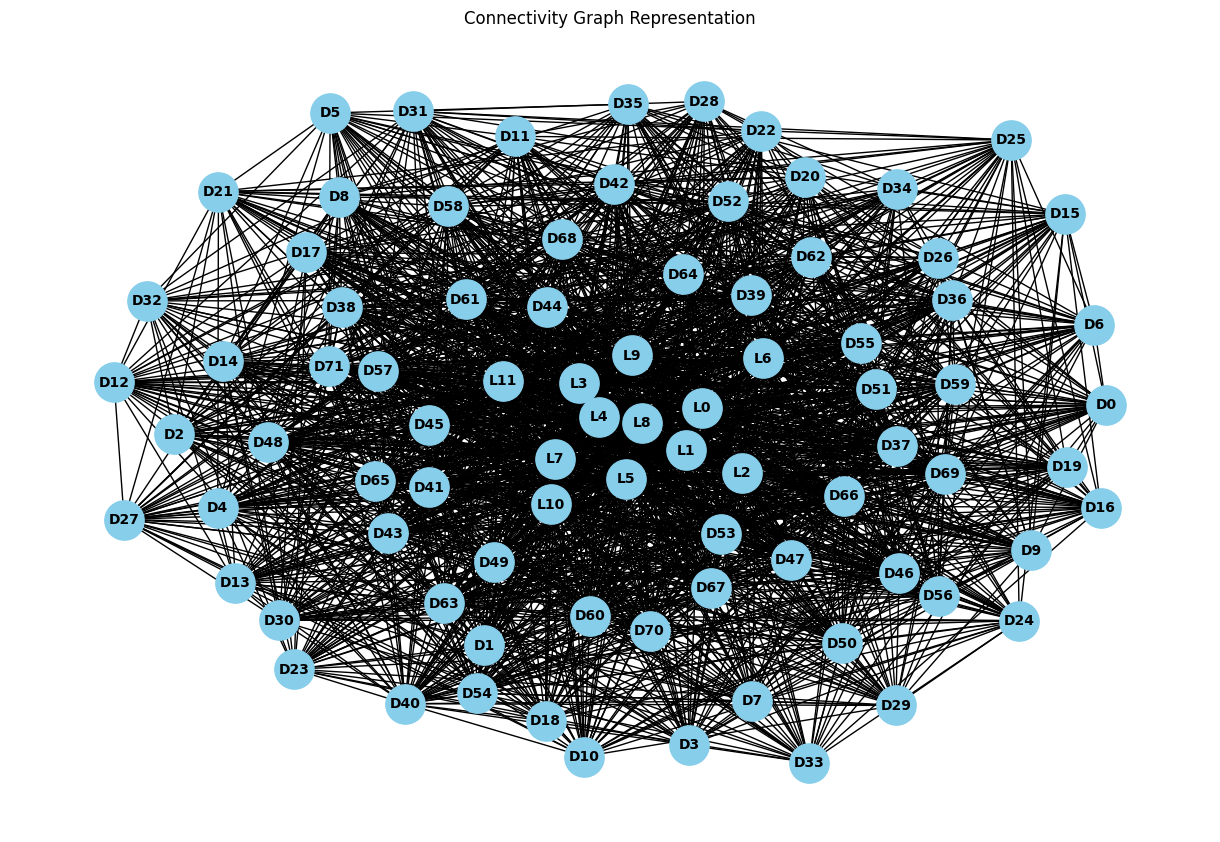

In [ ]:
connectivity_graph.draw()

### finder order

只考虑检测器，不考虑逻辑观测值。

In [ ]:
from hamld.contraction_strategy.mld_order_finder import GreedyMLDOrderFinder, ParallelGreedyMLDOrderFinder

order_finder = GreedyMLDOrderFinder(no_logical_connectivity_graph)
order = order_finder.find_order()
print(f"order: {order}")
print(f"max_dim:{order_finder.max_prob_dist_dimension}")
print(f"max_dim count:{order_finder.max_prob_dist_dimension_count}")
print(f"max_dim nodes:{order_finder.max_contracted_nodes}")

order: ['D0', 'D15', 'D18', 'D21', 'D5', 'D32', 'D14', 'D36', 'D25', 'D35', 'D52', 'D46', 'D10', 'D62', 'D67', 'D41', 'D63', 'D42', 'D17', 'D57', 'D11', 'D28', 'D31', 'D45', 'D48', 'D49', 'D58', 'D59', 'D64', 'D68', 'D1', 'D13', 'D16', 'D26', 'D27', 'D29', 'D34', 'D37', 'D38', 'D44', 'D51', 'D53', 'D54', 'D7', 'D71', 'D8', 'D12', 'D19', 'D2', 'D20', 'D22', 'D23', 'D24', 'D3', 'D30', 'D33', 'D39', 'D4', 'D40', 'D43', 'D47', 'D50', 'D55', 'D56', 'D6', 'D60', 'D61', 'D65', 'D66', 'D69', 'D70', 'D9']
max_dim:56
max_dim count:2
max_dim nodes:['D36', 'D35']


最大维度应该是56+12 = 68。

r = d，此时为114。

假设已知对应的逻辑观测器，将逻辑观测值也看作是检测器去收缩。

最大的维度为67，本质上和上述整体收缩的区别不大。

r = d，此时为126。

In [ ]:
from hamld.contraction_strategy.mld_order_finder import GreedyMLDOrderFinder, ParallelGreedyMLDOrderFinder

order_finder = GreedyMLDOrderFinder(connectivity_graph)
order = order_finder.find_order()
print(f"order: {order}")
print(f"max_dim:{order_finder.max_prob_dist_dimension}")
print(f"max_dim count:{order_finder.max_prob_dist_dimension_count}")
print(f"max_dim nodes:{order_finder.max_contracted_nodes}")

order: ['D32', 'D26', 'D16', 'D10', 'D63', 'D0', 'D11', 'D29', 'D37', 'D20', 'D21', 'D30', 'D67', 'D22', 'D31', 'D53', 'D59', 'D6', 'D13', 'D43', 'D57', 'D58', 'D3', 'D42', 'D47', 'D68', 'D69', 'L6', 'D36', 'D34', 'D50', 'D56', 'D65', 'D1', 'D12', 'D15', 'D18', 'D19', 'D33', 'D4', 'D40', 'D46', 'D49', 'D51', 'D54', 'D62', 'D64', 'D14', 'D17', 'D2', 'D23', 'D24', 'D25', 'D27', 'D28', 'D35', 'D38', 'D39', 'D41', 'D44', 'D45', 'D48', 'D5', 'D52', 'D55', 'D60', 'D61', 'D66', 'D7', 'D70', 'D71', 'D8', 'D9', 'L0', 'L1', 'L10', 'L11', 'L2', 'L3', 'L4', 'L5', 'L7', 'L8', 'L9']
max_dim:67
max_dim count:4
max_dim nodes:['D29', 'D37', 'D20', 'D21']


### 得到具体的收缩策略

In [ ]:
from hamld.contraction_strategy.mld_order_finder import GreedyMLDOrderFinder, ParallelGreedyMLDOrderFinder

order_finder = GreedyMLDOrderFinder(no_logical_connectivity_graph)
order = order_finder.find_order()

from hamld.contraction_strategy.contraction_tree import ContractionTree
from hamld.contraction_strategy.slice_finder import SliceFinder
from hamld.contraction_strategy.contraction_strategy import ContractionStrategy

contraction_tree = ContractionTree(order, detector_error_model=dem_r1)
slice_finder = SliceFinder(contraction_tree)

contraction_strategy = ContractionStrategy()
contraction_strategy.get_contraction_strategy(slice_finder=slice_finder)
print(contraction_strategy)

ContractionStrategy(
  order: ['D0', 'D15', 'D18', 'D21', 'D5', 'D32', 'D14', 'D36', 'D25', 'D35', 'D52', 'D46', 'D10', 'D62', 'D67', 'D41', 'D63', 'D42', 'D17', 'D57', 'D11', 'D28', 'D31', 'D45', 'D48', 'D49', 'D58', 'D59', 'D64', 'D68', 'D1', 'D13', 'D16', 'D26', 'D27', 'D29', 'D34', 'D37', 'D38', 'D44', 'D51', 'D53', 'D54', 'D7', 'D71', 'D8', 'D12', 'D19', 'D2', 'D20', 'D22', 'D23', 'D24', 'D3', 'D30', 'D33', 'D39', 'D4', 'D40', 'D43', 'D47', 'D50', 'D55', 'D56', 'D6', 'D60', 'D61', 'D65', 'D66', 'D69', 'D70', 'D9'],
  sliced_hyperedges: [],
  contraction_cost: 390267254299688959,
  contraction_width: 56,
  sliced_contraction_cost: 390267254299688959,
  sliced_contraction_width: 56
)


上述结果，理论上还需要收缩成本 = 上述收缩成本×2^k(逻辑比特数)。

* 这是一个非常、非常、非常巨大的收缩成本。

## 根据上述收缩方式，进行近似收缩。


### 构建收缩器

In [ ]:
from typing import  Dict, Union, List

def build_hyperedge_contraction_caches(contractable_hyperedges_weights_dict: Dict[str, Union[np.float32, np.float64, np.float128]], order: List[str]):
    """优化后的缓存构建方法"""
    hyperedge_cache = {}  # hyperedge -> list(parts)
    relevant_hyperedge_cache = {}  # detector -> set(hyperedges)
    
    # 使用集合提高查找效率
    remaining_hyperedges = set(contractable_hyperedges_weights_dict.keys())
    
    for detector in order:
        relevant_set = set()
        hyperedges_to_remove = set()
        
        for hyperedge in remaining_hyperedges:
            # 缓存分割结果
            if hyperedge not in hyperedge_cache:
                hyperedge_cache[hyperedge] = hyperedge.split(',')
            
            # 检查是否包含当前detector
            if detector in hyperedge_cache[hyperedge]:
                relevant_set.add(hyperedge)
                hyperedges_to_remove.add(hyperedge)
        
        relevant_hyperedge_cache[detector] = relevant_set
        remaining_hyperedges -= hyperedges_to_remove  # 批量移除
    return (hyperedge_cache, relevant_hyperedge_cache)

hypergraph = DetectorErrorModelHypergraph(detector_error_model = dem_r1, have_logical_observable=True)
original_dict = hypergraph.get_hyperedges_weights_dict()
contractable_hyperedges_weights_dict: dict[str, float] = {",".join(key): float(value) for key, value in original_dict.items()}

num_detectors : int = dem_r1.num_detectors
num_observables : int = dem_r1.num_observables

order: list[str] = contraction_strategy.order
sliced_hyperedges: list[str] = [",".join(hyperedge) for hyperedge in contraction_strategy.sliced_hyperedges]
accuracy: str = "float32"

hyperedge_cache, relevant_hyperedge_cache = build_hyperedge_contraction_caches(contractable_hyperedges_weights_dict, order)

构建收缩器

In [ ]:
from hamld.contraction_executor import ApproximateContractionExecutorQldpc
approximatestrategy = "hyperedge_threshold"
approximate_param = 10**-3

contractor = ApproximateContractionExecutorQldpc(
    num_detectors,
    num_observables,
    order,
    sliced_hyperedges,
    contractable_hyperedges_weights_dict,
    accuracy,
    approximatestrategy,
    approximate_param,
    hyperedge_cache,
    relevant_hyperedge_cache,
)

### 解码分析

In [ ]:
import time
import numpy as np

np.random.seed(100)
# random_syndrome = np.random.choice([False, True], size=dem_r1.num_detectors)
syndrome = np.array([False] * dem_r1.num_detectors)
# print("random_syndrome", random_syndrome)
start = time.time()
prob_dist = contractor.mld_contraction_no_slicing(syndrome)
print(f"end contraction: {time.time() - start}")
print(f"output prob_dist:", prob_dist)

# # Validate and return the prediction
prediction, prob_correct_correction = contractor.validate_logical_operator(prob_dist)
print(f"prediction:", prediction)

end contraction: 0.003189563751220703
output prob_dist: {'000000000000000000000000000000000000000000000000000000000000000000000000000000000000': np.float32(0.28581503)}
prediction: [[False False False False False False False False False False False False]]


In [ ]:
# syndrome = np.array([False] * dem_r1.num_detectors)
shots = 10
syndrome_length = dem_r1.num_detectors
syndrome = np.random.rand(shots, syndrome_length) < 0.5 
# syndrome = np.array([True] + [False] * (dem_r1.num_detectors-1))
contraction_times = []
for i in range(2, 14, 2):
    approximate_param = 10**-i
    print("approximate_param:", approximate_param)
    contractor = ApproximateContractionExecutorQldpc(
        num_detectors,
        num_observables,
        order,
        sliced_hyperedges,
        contractable_hyperedges_weights_dict,
        accuracy,
        approximatestrategy,
        approximate_param,
        hyperedge_cache,
        relevant_hyperedge_cache,
    )
    start = time.time()
    for i in range(shots):
        prob_dist = contractor.mld_contraction_no_slicing(syndrome[i,:])
        prediction, prob_correct_correction = contractor.validate_logical_operator(prob_dist)
    end_time = time.time()
    # print(f"end contraction: {time.time() - start}")
    contraction_times.append((end_time - start)/shots)
    print(f"output prob_dist:", prob_dist)
    # # Validate and return the prediction
    print(f"prediction:", prediction)

approximate_param: 0.01
output prob_dist: {}
prediction: [False False False False False False False False False False False False]
approximate_param: 0.0001
output prob_dist: {}
prediction: [False False False False False False False False False False False False]
approximate_param: 1e-06


output prob_dist: {}
prediction: [False False False False False False False False False False False False]
approximate_param: 1e-08
output prob_dist: {}
prediction: [False False False False False False False False False False False False]
approximate_param: 1e-10
output prob_dist: {}
prediction: [False False False False False False False False False False False False]
approximate_param: 1e-12
output prob_dist: {}
prediction: [False False False False False False False False False False False False]


In [ ]:
contraction_times

[0.00037512779235839846,
 0.001534724235534668,
 0.015555381774902344,
 0.09182884693145751,
 0.6882210493087768,
 7.238506245613098]

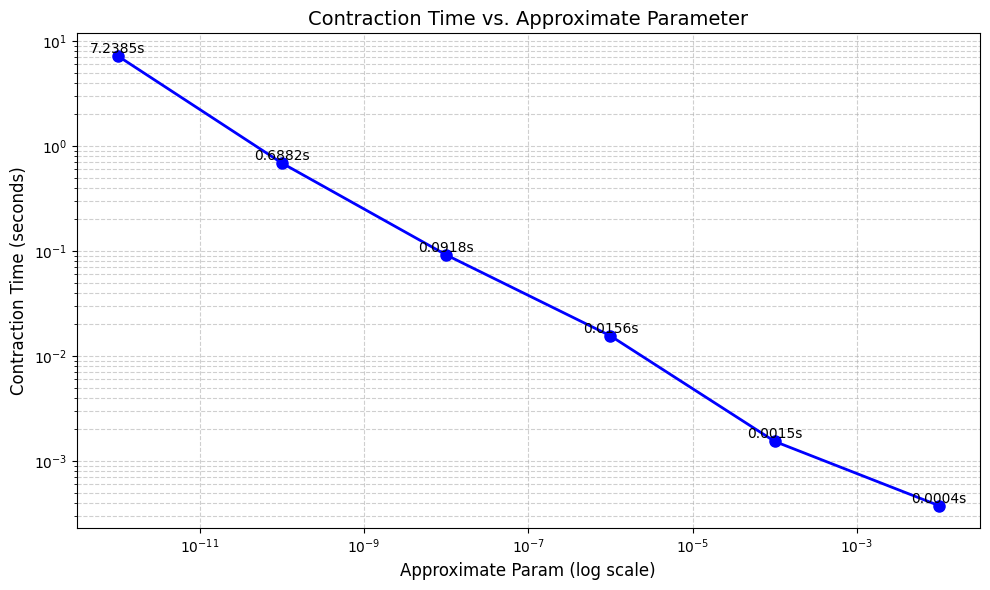

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设已通过实验获取以下数据（示例数据，需替换为你的实际数据）
approximate_params = [10**-i for i in range(2, 14, 2)]  # [1e-2, 1e-3, ..., 1e-9]
contraction_times

# ----------------------------
# 绘制对数坐标图
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(approximate_params, contraction_times, 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# 设置对数坐标轴
plt.xscale('log')
plt.yscale('log')  # 如果时间跨度大也使用对数

# 标签和标题
plt.title("Contraction Time vs. Approximate Parameter", fontsize=14)
plt.xlabel("Approximate Param (log scale)", fontsize=12)
plt.ylabel("Contraction Time (seconds)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.6)

# 显示数值标签（可选）
for x, y in zip(approximate_params, contraction_times):
    plt.text(x, y, f"{y:.4f}s", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

任意的syndrome的解码时间，要比全为False的解码时间要短。

采用其他的近似策略hyperedge_topk。

In [ ]:
# syndrome = np.array([False] * dem_r1.num_detectors)
# approximatestrategy = "hyperedge_topk"
approximatestrategy = "node_topk"
shots = 10
syndrome_length = dem_r1.num_detectors
syndrome = np.random.rand(shots, syndrome_length) < 0.5 
# syndrome = np.array([True] + [False] * (dem_r1.num_detectors-1))
contraction_times = []
approximate_params = [5]
for approximate_param in approximate_params:
    approximate_param = approximate_param
    print("approximate_param:", approximate_param)
    contractor = ApproximateContractionExecutorQldpc(
        num_detectors,
        num_observables,
        order,
        sliced_hyperedges,
        contractable_hyperedges_weights_dict,
        accuracy,
        approximatestrategy,
        approximate_param,
        hyperedge_cache,
        relevant_hyperedge_cache,
    )
    start = time.time()
    for i in range(shots):
        prob_dist = contractor.mld_contraction_no_slicing(syndrome[i,:])
        prediction, prob_correct_correction = contractor.validate_logical_operator(prob_dist)
    end_time = time.time()
    # print(f"end contraction: {time.time() - start}")
    contraction_times.append((end_time - start)/shots)
    print(f"output prob_dist:", prob_dist)
    # # Validate and return the prediction
    print(f"prediction:", prediction)

approximate_param: 5
output prob_dist: {}
prediction: [False False False False False False False False False False False False]


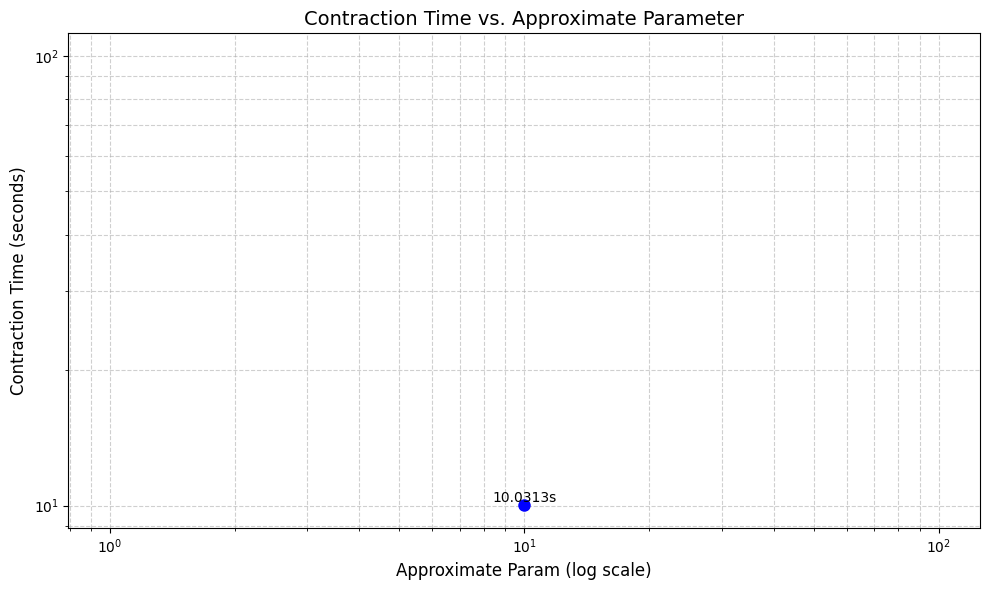

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 假设已通过实验获取以下数据（示例数据，需替换为你的实际数据）
# approximate_params = [i**2 for i in range(2, 14, 2)]  # [1e-2, 1e-3, ..., 1e-9]
# approximate_params = [10, 50, 100, 200, 400, 600, 800, 1000]
approximate_params = [10]
contraction_times

# ----------------------------
# 绘制对数坐标图
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(approximate_params, contraction_times, 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# 设置对数坐标轴
plt.xscale('log')
plt.yscale('log')  # 如果时间跨度大也使用对数

# 标签和标题
plt.title("Contraction Time vs. Approximate Parameter", fontsize=14)
plt.xlabel("Approximate Param (log scale)", fontsize=12)
plt.ylabel("Contraction Time (seconds)", fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.6)

# 显示数值标签（可选）
for x, y in zip(approximate_params, contraction_times):
    plt.text(x, y, f"{y:.4f}s", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 采样的syndrome分布情况

In [ ]:
from hamld.benchmark import generate_qldpc_syndrome_and_observables
nkd = [72, 12, 6]
r = 1
p = 10
noise_model = "si1000"
error_type = "Z"
data_path = "/home/normaluser/ck/hamld/data/external/hamld_experiment_data/paper_experiment_bb_codes"
# 生成 QLDP 码的 syndrome 和 observables
syndrome, actual_observables = generate_qldpc_syndrome_and_observables(nkd, r, p, noise_model, error_type, data_path)

In [ ]:
import cudf
import numpy as np
sample = np.hstack((syndrome, actual_observables))
len_syndrome = syndrome.shape[1]

# 尝试使用 cudf 进行处理
df = cudf.DataFrame(sample)
unique_counts = df.value_counts().reset_index()
unique_sample = unique_counts.iloc[:, :-1].to_numpy()
counts = unique_counts.iloc[:, -1].to_numpy()

# unique_sample, counts = np.unique(sample, axis=0, return_counts=True)
num_unique_shots = unique_sample.shape[0]

# 切割出syndrome和observables部分
unique_syndrome = unique_sample[:, :len_syndrome]
unique_actual_observables = unique_sample[:, len_syndrome:]

print(f"Unique syndrome shape: {unique_syndrome.shape}, Unique actual observables shape: {unique_actual_observables.shape}")

Unique syndrome shape: (171984, 72), Unique actual observables shape: (171984, 12)


In [ ]:
unique_counts

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,286398
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,2494
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2459
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2442
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171979,False,True,False,True,False,False,False,False,False,False,...,True,False,True,False,True,False,True,False,True,1
171980,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,1
171981,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,1
171982,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1


In [ ]:
sort_columns = [unique_counts.columns[i] for i in range(-2, -86, -1)]

# sort_columns
sorted_counts = unique_counts.sort_values(by=sort_columns, ascending=True)


In [ ]:
286398/10**6

0.286398

#### 仅仅考虑syndrome

可能出现的syndrome

In [ ]:
import cudf
# 尝试使用 cudf 进行处理
df_syndrome = cudf.DataFrame(syndrome)
unique_counts_syndrome = df_syndrome.value_counts().reset_index()
unique_sample_syndrome = unique_counts_syndrome.iloc[:, :-1].to_numpy()
counts_syndrome = unique_counts_syndrome.iloc[:, -1].to_numpy()

# unique_sample, counts = np.unique(sample, axis=0, return_counts=True)
num_unique_shots_syndrome = unique_sample_syndrome.shape[0]

print(f"Unique syndrome shape: {unique_syndrome.shape}, Unique actual observables shape: {unique_actual_observables.shape}")

Unique syndrome shape: (171984, 72), Unique actual observables shape: (171984, 12)


In [ ]:
counts_syndrome

array([286398,   2494,   2459, ...,      1,      1,      1])

每行的True数量: [0 2 2 ... 6 8 7]
24 (171971,)


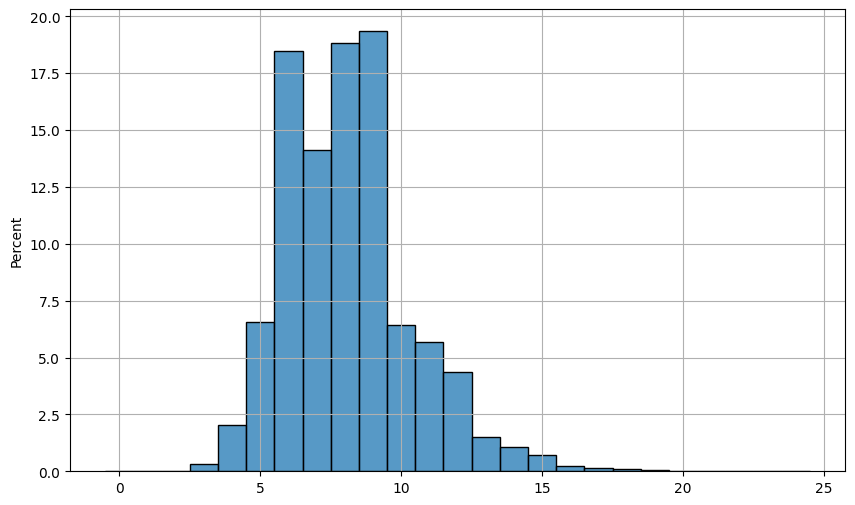

平均每行True数量: 8.10
中位数: 8.0
最小值: 0
最大值: 24
标准差: 2.26


In [ ]:
true_per_row = np.sum(unique_sample_syndrome, axis=1)
print("每行的True数量:", true_per_row)
print(max(true_per_row), true_per_row.shape)

import matplotlib.pyplot as plt
import seaborn as sns

# ... existing code ...

plt.figure(figsize=(10, 6))
sns.histplot(true_per_row, bins=range(0, true_per_row.max()+2), discrete=True, stat='percent')
# plt.title('每行True数量的分布')
# plt.xlabel('每行的True数量')
# plt.ylabel('百分比(%)')
plt.grid(True)
plt.show()

# 统计指标
print(f"平均每行True数量: {np.mean(true_per_row):.2f}")
print(f"中位数: {np.median(true_per_row)}")
print(f"最小值: {true_per_row.min()}")
print(f"最大值: {true_per_row.max()}")
print(f"标准差: {np.std(true_per_row):.2f}")